In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import seaborn as sns
import numpy as np

%matplotlib inline

plt.style.use('bmh')

plt.style.use('default')
sns.set(style="whitegrid")

In [ ]:
filepath = 'fiuba-trocafone-tp1-final-set/events.csv'
trocafone_events = pd.read_csv(filepath, low_memory = False)
trocafone_events['timestamp'] = pd.to_datetime(trocafone_events['timestamp'])

# Primeras 5 filas

In [76]:
trocafone_events.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:00,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:00,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:00,viewed product,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:00,checkout,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:00,viewed product,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Ultimas 5 filas

In [4]:
trocafone_events.tail()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
1011283,2018-06-11 12:31:00,checkout,ffffa8d1,NaN,8512,Samsung Galaxy S7 Edge,Muito Bom,32GB,Preto,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011284,2018-06-04 23:18:00,visited site,ffffac8a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Unknown,Unknown,Brazil,Smartphone,320x534,Android 6,Chrome Mobile 39
1011285,2018-06-04 23:18:00,ad campaign hit,ffffac8a,/comprar/samsung/galaxy-s7-edge,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011286,2018-06-04 23:18:00,viewed product,ffffac8a,NaN,8527,Samsung Galaxy S7 Edge,Bom,32GB,Prata,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011287,2018-06-04 23:18:00,checkout,ffffac8a,NaN,8527,Samsung Galaxy S7 Edge,Bom,32GB,Prata,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Informacion sobre el dataframe

In [5]:
trocafone_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null datetime64[ns]
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region            

### Rango de fechas del set de datos: claramente este ultimo no s encuentra ordenado por fecha, segun el primer vistazo con las primeras 5 filas y las ultimas 5 filas

In [6]:
trocafone_events['timestamp'].max()

Timestamp('2018-06-15 23:59:00')

In [7]:
trocafone_events['timestamp'].min()

Timestamp('2018-01-01 07:32:00')

In [8]:
# Como fueron las ventas durante los 5 meses de datos que se obtienen de este año? Cantidad de ventas mensuales
# No se toma en cuenta el mes de junio porque los datos están hasta el 15 del mes

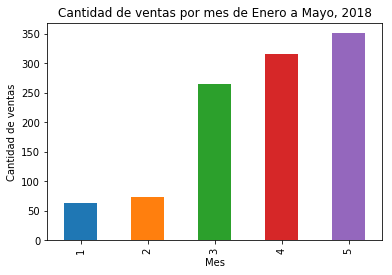

In [9]:
conversion_e = trocafone_events.loc[(trocafone_events['event'] == 'conversion') & (trocafone_events.timestamp.dt.month < 6), :]
monthly_conversions = conversion_e['timestamp'].groupby(conversion_e.timestamp.dt.month).agg('count')
monthly_conversions.plot.bar()
plt.xlabel('Mes')
plt.ylabel('Cantidad de ventas')
plt.title('Cantidad de ventas por mes de Enero a Mayo, 2018')
plt.show()

# Datos sobre el modelo (columna 'model')

In [10]:
# Cuales son los distintos modelos de dispositivos o marcas. Se obtiene la primera palabra de la columna model
# donde claramente contiene la marca

In [11]:
trocafone_events['model'].str.split(n=1).str[0].unique()

array([nan, 'iPhone', 'Samsung', 'Motorola', 'Asus', 'Quantum', 'Lenovo',
       'Sony', 'LG', 'iPad', 'Blackberry'], dtype=object)

In [12]:
#Cuales son las marcas mas vendidas en todo el set de datos (evento conversion)

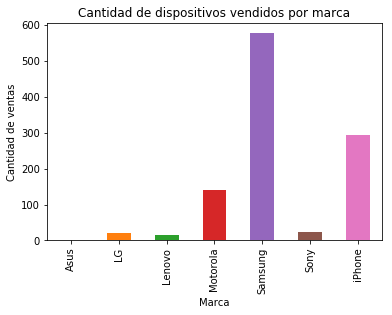

In [13]:
model_conversion = conversion_e['model'].groupby(conversion_e.model.str.split(n=1).str[0]).agg('count')
model_conversion.plot.bar()
plt.xlabel('Marca')
plt.ylabel('Cantidad de ventas')
plt.title('Cantidad de dispositivos vendidos por marca')
plt.show()

In [14]:
# Cual es el modelo mas vendido de todos los modelos disponibles? (Da lo mismo, no se si es necesario)

In [15]:
conversion_e['model'].groupby(conversion_e.model).agg('count').idxmax()

'Samsung Galaxy J5'

# Patrón Usuarios <-> Eventos

In [61]:
checkout_event_count = trocafone_events.loc[trocafone_events['event'] == 'checkout']['event'].count()
conversion_event_count = trocafone_events.loc[trocafone_events['event'] == 'conversion']['event'].count()

print("Cantidad de checkouts")
print(checkout_event_count)
print("Cantidad de conversions")
print(conversion_event_count)

Cantidad de checkouts
33735
Cantidad de conversions
1172


In [72]:
checkout_conversion_events = trocafone_events.loc[trocafone_events['event'].isin(['conversion','checkout'])][['person','event']]
checkout_conversion_events = pd.concat([checkout_conversion_events, pd.get_dummies(checkout_conversion_events['event'])], axis=1)[['person','checkout','conversion']].groupby(['person']).max()
#checkout_conversion_events.shape
#type(pd.get_dummies(checkout_conversion_events['event']))
conversion_count = checkout_conversion_events.loc[checkout_conversion_events['conversion'] > 0].agg({'conversion':'sum','checkout':'sum'})

conversion_count

conversion    716
checkout      716
dtype: int64

In [74]:
checkout_count = checkout_conversion_events.loc[checkout_conversion_events['checkout'] > 0].agg({'conversion':'sum','checkout':'sum'})
checkout_count

conversion      716
checkout      27624
dtype: int64

In [210]:
searched_products = trocafone_events.loc[trocafone_events['event'] == 'searched products'][['timestamp','person','skus','search_term']].dropna(axis=0)
searched_products['search_term'] = searched_products['search_term'].str.lower()

In [211]:
searched_products['searched_model'] = searched_products['search_term']

searched_products.loc[searched_products['search_term'].str.contains('samsung|sansung|sansumg|s3|s4|s5|s6|s7|s8|s9|a3|a5|a7|a8|a9|a10|j1|j2|j3|j4|j5|j7|j8|e5|e7|galaxy|note|prime|edge')
                      ,'searched_model'] = 'samsung'
searched_products.loc[searched_products['search_term'].str.contains('iphone|apple|ipad|i phone|aple|iphome|4s|5s|6s|7s|8s')
                      ,'searched_model'] = 'apple'
searched_products.loc[searched_products['search_term'].str.contains('moto|g4 plus|g5 plus')
                      ,'searched_model'] = 'motorola'
searched_products.loc[searched_products['search_term'].str.contains('lg|k8|k10|k 10|k4')
                      ,'searched_model'] = 'lg'
searched_products.loc[searched_products['search_term'].str.contains('asus|zonfone|zenfone|azus|assus')
                      ,'searched_model'] = 'asus'
searched_products.loc[searched_products['search_term'].str.contains('nokia|lumia')
                      ,'searched_model'] = 'nokia'
searched_products.loc[searched_products['search_term'].str.contains('lenovo')
                      ,'searched_model'] = 'lenovo'
searched_products.loc[searched_products['search_term'].str.contains('sony|xperia|x-peria')
                      ,'searched_model'] = 'sony'
searched_products.loc[searched_products['search_term'].str.contains('blackberry')
                      ,'searched_model'] = 'blackberry'
searched_products.loc[searched_products['search_term'].str.contains('quantum')
                      ,'searched_model'] = 'quantum'


searched_products = searched_products.loc[searched_products['searched_model'].isin(['samsung','apple','motorola','lg','asus','nokia','sony','blackberry','lenovo','quantum'])]

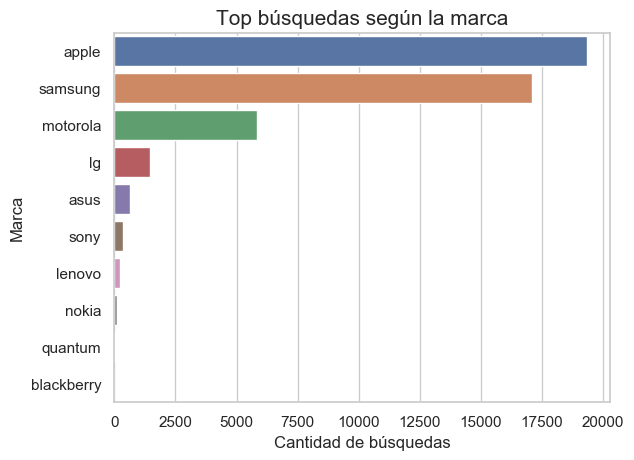

In [216]:
top_searched = searched_products.groupby('searched_model')['searched_model'].count().sort_values(ascending=False)
g = sns.barplot(x=top_searched.values, y=top_searched.index, orient='h')
g.set_title("Top búsquedas según la marca", fontsize=15)
g.set_xlabel("Cantidad de búsquedas", fontsize=12)
g.set_ylabel("Marca", fontsize=12)
plt.show()